# Regression ML Case Study Project

In this case study we will work through a regression predictive modeling machine learning problem end-to-end.

## Defining the Problem

For this project we will investigate the Boston House Price dataset. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing)):

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

We can see that the input features have a mixture of units.

## Load the Dataset
We will start load some libraries we need to start loading the dataset and begin some exploration of the data.

In [1]:
# import libraries and load the datasets
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas import set_option
plt.style.use('ggplot')
%matplotlib inline

filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(filename, delim_whitespace=True, names=names)


## Analyze Data

We can begin taking a closer look at our data.

### Descriptive Statistics
We start off by confirming the dimensions of the dataset.

In [2]:
# shape
dataframe.shape

(506, 14)

We have 506 rows and 14 features including the output feature *MEDV*.

Let's look at the data types of each feature.

In [3]:
# types
dataframe.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
# head
dataframe.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


By peeking at the dataset we can confirm that the scales for the attributes are all over the place because of the differing units. We may benefit from some transforms later on.

Let's summarise the distribution of each feature.

In [5]:
# descriptions
pd.options.display.float_format = '{:.3f}'.format
set_option('display.width', 100)
set_option('precision', 1)
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


We now have a better feeling for how different the features are. The min and max values as well as the means vary a lot. We are likely going to get better results by rescaling the data in some way.

Let's now take a look at the correlation between all of the numeric features.

In [6]:
# correlation
set_option('precision', 2)
dataframe.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


This is interesting. We can see that many of the features have a strong correlation (e.g. > 0:70 or < -0.70). For example:
* NOX and INDUS with 0.77.
* DIS and INDUS with -0.71.
* TAX and INDUS with 0.72.
* AGE and NOX with 0.73.
* DIS and NOX with -0.78.

It also looks like LSTAT has a good negative correlation with the output variable MEDV with a value of -0.74. RM also has a good positive correlation with MEDV.

## Data Visualisations
### Unimodal Data Visualizations
Let's look at visualisations of individual features. It is often useful to look at our data using multiple different visualisations in order to spark ideas. Let's look at histograms of each attribute to get a sense of the data distributions.

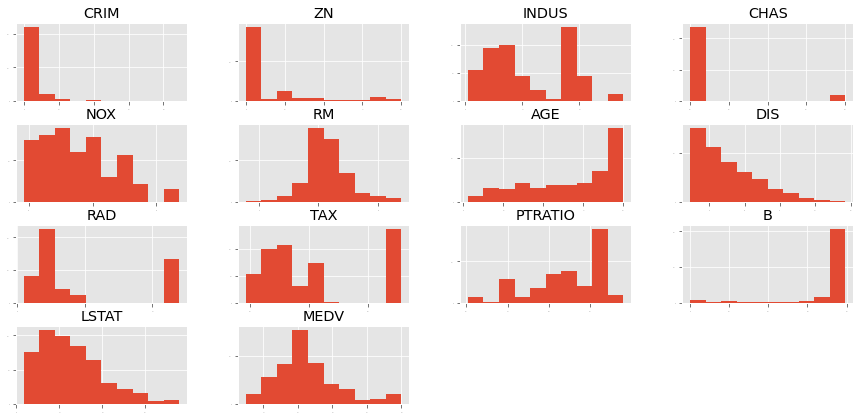

In [7]:
# histograms
dataframe.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,7))
plt.show()

We can see that some features may have an exponential distribution, such as CRIM, ZN,
AGE and B. We can see that others may have a bimodal distribution such as RAD and TAX.

Let's look at the same distributions using density plots that smooth them out a bit.

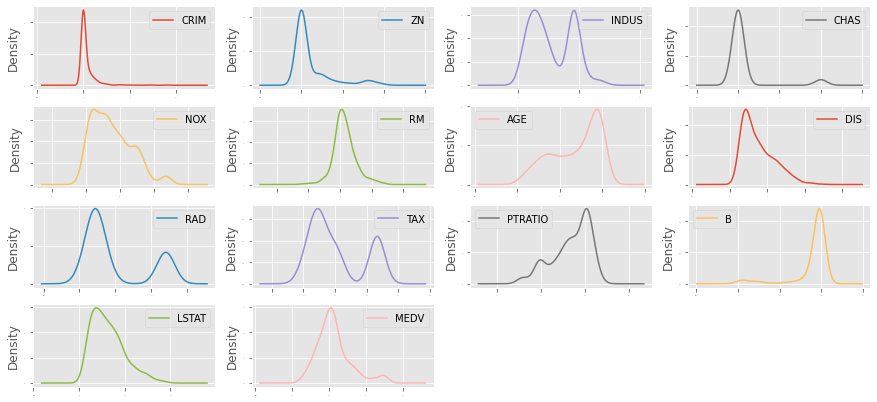

In [8]:
# Univariate Density Plots
dataframe.plot(kind='density', subplots=True, layout=(4,4), figsize=(15,7), sharex=False, fontsize=1)
plt.show()

This perhaps adds more evidence to our suspicion about possible exponential and bimodal distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

Let's look at the data with box and whisker plots of each feature.

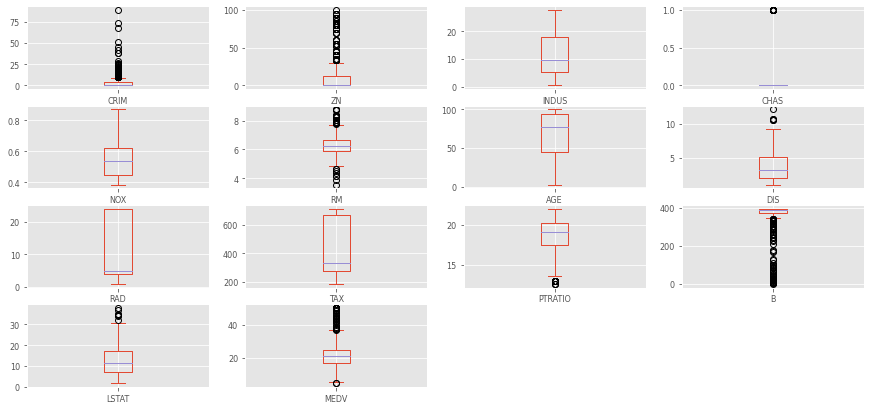

In [9]:
# Univariate box and whisker plots
dataframe.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7), sharex=False, sharey=False, fontsize=8)
plt.show()

This helps point out the skew in many distributions so much so that data looks like outliers (e.g. beyond the whisker of the plots).

### Multimodal Data Visualizations
Let's look at some visualisations of the interactions between variables. The best place to start is a scatter plot matrix.

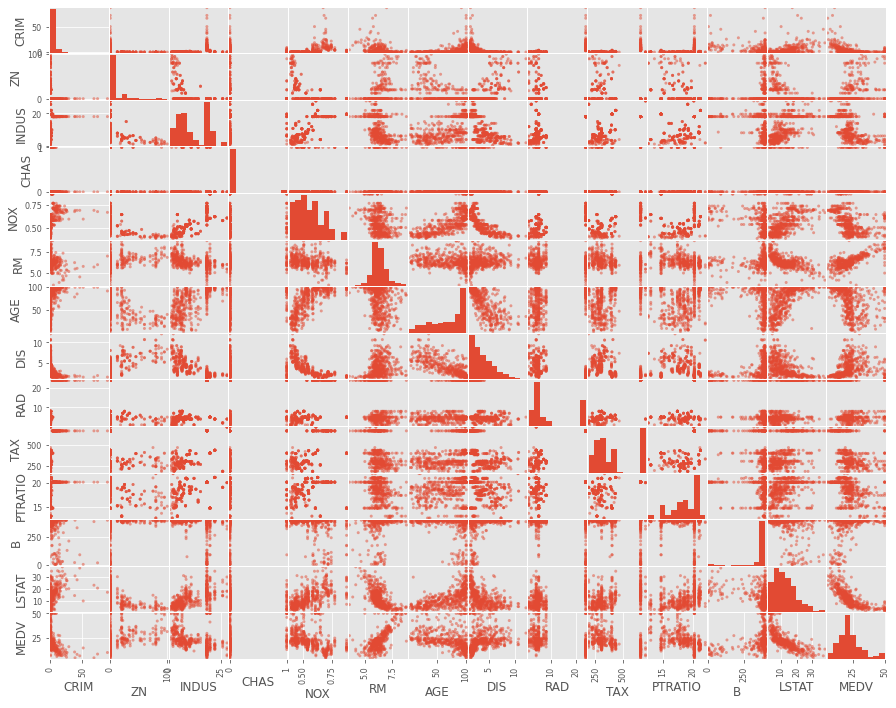

In [10]:
# Scatter plot Matrix
scatter_matrix(dataframe, figsize=(15,12))
plt.show()

We can see that some of the higher correlated attributes do show good structure in their relationship. Not linear, but nice predictable curved relationships.

Let's also visualise the correlations between the features.

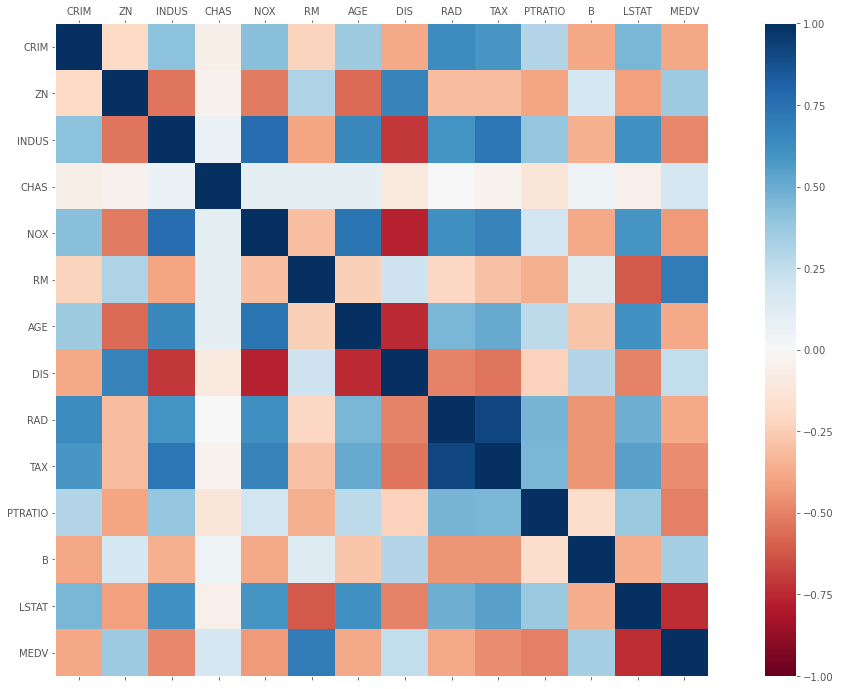

In [11]:
# Correction Matrix Plot
plt.rcParams['axes.grid'] = False 
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1, interpolation='none', cmap='RdBu')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

The dark blue color shows positive correlation whereas the dark red color shows negative correlation. We can also see some dark red and dark blue that suggest candidates for removal to better improve accuracy of models later on.

## Summary of Ideas
There is a lot of structure in this dataset. We need to think about transforms that we could use later to better expose the structure which in turn may improve modeling accuracy. So far it would be worth trying:

* Feature selection and removing the most correlated features.
* Normalising the dataset to reduce the effect of differing scales.
* Standardising the dataset to reduce the effects of differing distributions.

## Validation Dataset
We're now going to split our data into training and validation hold-out set. Validation hold-out set is a sample of data that we hold back from our analysis and modeling. We will use it right at the end of our project to confirm the accuracy of our final model. Validation let's us know if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [12]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split # import a library for splitting the dataset
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Evaluate Algorithms: Baseline
We have no idea what algorithm will do well on this problem. So, we'll design a test harness where we use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We'll evaluate the algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [13]:
# Test options and evaluation metric
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The six algorithms selected include:
* **Linear Algorithms**: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
(EN).
* **Nonlinear Algorithms**: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

Let's load the models:

In [14]:
# load models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [15]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

The algorithms all use default tuning parameters. Let's compare the algorithms. We will display the mean and standard deviation of MSE for each algorithm as we calculate it and
collect the results for use later.

In [16]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -27.969835 (21.359839)
SVR: -67.824705 (32.801530)


It looks like LR has the lowest MSE, followed closely by CART.

Let's take a look at the distribution of scores across all cross validation folds by algorithm.

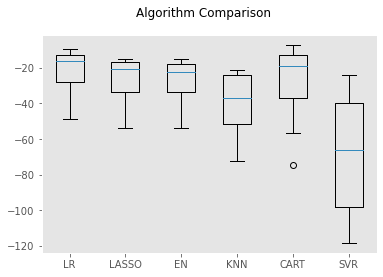

In [17]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART and LASSO.

The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN. In the next section we will look at running the same
algorithms using a standardized copy of the data.

## Evaluate Algorithms: Standardization
We're now going to evaluate the algorithms with a standardised copy of the dataset. This is where the data is transformed such that each feature has a mean value of
zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardise the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardised data might perform on unseen data.

In [18]:
# Standardise the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -26.364004 (17.404242)
ScaledSVR: -29.570433 (18.052964)


Running the example provides a list of mean squared errors. We can see that scaling did have an effect on KNN, driving the error lower than the other models.

Let's take a look at the distribution of the scores across the cross validation folds.

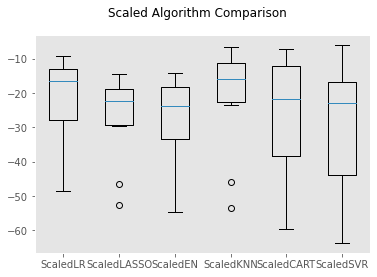

In [19]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that KNN has both a tight distribution of error and has the lowest score.

## Improve Results With Tuning
Since we know from the results in the previous section that KNN achieves good results on a scaled version of the dataset. But can it do better. The default value for the number of neighbors in KNN is 5. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 5. Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset.

In [20]:
# KNN Algorithm tuning
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

We can display the mean and standard deviation scores as well as the best performing value for k below.

In [21]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


We can see that the best for k (n neighbors) is 1 providing a mean squared error of -19.497829, the best so far.

## Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:
* **Boosting Methods**: AdaBoost (AB) and Gradient Boosting (GBM).
* **Bagging Methods**: Random Forests (RF) and Extra Trees (ET).

We will use the same test harness as before, 10-fold cross validation and pipelines that standardise the training data for each fold.

In [22]:
# load models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -16.275786 (8.285402)
ScaledGBM: -11.025590 (8.557436)
ScaledRF: -12.532977 (9.065275)
ScaledET: -9.285598 (6.467911)


Running the example calculates the mean squared error for each method using the default parameters. We can see that we're generally getting better scores than our linear and nonlinear algorithms in previous sections.

We can also plot the distribution of scores across the cross validation folds.

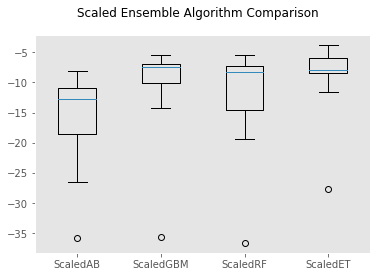

In [23]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like Extra Trees has a better mean score, it also looks like Gradient Boosting has a similar distribution and perhaps a better median score.

We can probably do better, given that the ensemble techniques used the default parameters. In the next section we will look at tuning the Extra Trees to further lift the performance.

## Tune Ensemble Methods
The default number of boosting stages to perform (n estimators) is 100. This is a good candidate parameter of Extra Trees to tune. Often, the larger the number of boosting
stages, the better the performance but the longer the training time. In this section we will look at tuning the number of stages for Extra Trees. Below we define a parameter grid n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross validation.

In [24]:
# Tune scaled ET
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

Like before, we can summarize the best configuration and get an idea of how performance changed with each different configuration.

In [25]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.016279 using {'n_estimators': 150}
-9.431419 (6.682316) with: {'n_estimators': 50}
-9.141589 (6.323830) with: {'n_estimators': 100}
-9.016279 (6.244052) with: {'n_estimators': 150}
-9.066266 (6.212076) with: {'n_estimators': 200}
-9.141895 (6.328563) with: {'n_estimators': 250}
-9.162757 (6.407527) with: {'n_estimators': 300}
-9.161324 (6.423344) with: {'n_estimators': 350}
-9.152246 (6.491571) with: {'n_estimators': 400}


We can see that the best configuration was n estimators=150 resulting in a mean squared error of -9.016279, about 0.13 units better than the untuned method.

## Finalise Model
In this section we will finalise the extra trees model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardising the training dataset before training.

In [26]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=150)
model.fit(rescaledX, Y_train)

ExtraTreesRegressor(n_estimators=150, random_state=7)

We can then scale the inputs for the validation dataset and generate predictions.

In [27]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

12.74953946840959


We can see that the estimated mean squared error is 12.75, close to our estimate of -9.02.

# Conclusion
In this project we worked through a regression predictive modeling machine learning problem from end-to-end using Python. Specifically, the steps we covered were:
* Problem Definition (Boston house price data).
* Loading the Dataset.
* Analyze Data (some skewed distributions and correlated attributes).
* Evaluate Algorithms (Linear Regression looked good).
* Evaluate Algorithms with Standardisation (KNN looked good).
* Algorithm Tuning (K=1 for KNN was best).
* Ensemble Methods (Bagging and Boosting, Extra Trees looked good).
* Tuning Ensemble Methods (getting the most from Extra Trees).
* Finalize Model (use all training data and confirm using validation dataset).

Working through this case study is a good practice at applied machine learning using Python and scikit-learn.
